<a href="https://colab.research.google.com/github/Adeve903/Ambuj-EDA-Hotel-booking/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

###IMPORTING MODULES AND LOADING **DATA**

In [59]:
#IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

In [60]:
#Mountng the drive
from google.colab import drive                    
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
#Reading the file
hotel_df = pd.read_csv("/content/drive/MyDrive/Hotel Booking/Hotel Bookings.csv")

###UNDERSTANDING THE DATA

In [62]:
#GETTING THE FIRST FIVE ENTRIES
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [63]:
#GETTING THE LAST FIVE ENTRIES
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [64]:
#GETTING ALL THE COLUMNS
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [65]:
#GETTING THE SHAPE OF DATASET,i.e NO.OF ROWS AND COLUMNS
hotel_df.shape

(119390, 32)

In [66]:
#CHECKING DETAILS OF EVERY COLUMN
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [67]:
#GETTING THE INSSIGHTS OF THE DATA
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [68]:
#GETTING THE DATATYPES OF ALL COLUMNS
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [69]:
#GETTING THE UNIQUE VALUES IN COLUMNS
hotel_df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

###HANDLING THE MISSING AND DUPLICATES VALUES

In [70]:
#CHECKING THE DUPLICATES ROWS IN THE DATASET
hotel_df[hotel_df.duplicated()].shape

(31994, 32)

In [71]:
#REMOVING THE DUPLICATES
hotel_df.drop_duplicates(inplace=True)

In [72]:
hotel_df.shape

(87396, 32)

The dupliactes have been removed.

In [73]:
#COUNT OF MISSING VALUES
hotel_df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


The columns country,children,company and agent have null values.So,we will replace these null values with 0.

In [74]:
#REPLACING THE MISSING VALUES WITH 0
hotel_df[['agent','children','company']] = hotel_df[['agent','children','company']].fillna(0)

The columns agent,company and children are in float data type, so the missing values has been replaced with 0.

In [75]:
hotel_df['country'].fillna('others',inplace=True)

The country is in object datatype, so the missing values has been replace with 'others'.

In [76]:
#CONVERTING DATATYPES OF AGENT,CHILDREN AND COMPANY  FROM FLOAT TO INTEGER
hotel_df[['agent','children','company']] = hotel_df[['agent','children','company']].astype('int64')

In [77]:
#ADDING IMPORTANT COLUMNS
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']

#CREATING NEW COLUMN TOTAL PEOPLE BY ADDING ADULTS, CHILDRENS AND BABIES
hotel_df['total_people'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

###EXPLORATORY DATA ANALYSIS

FINDING THE CORRELATION BETWEEN NUMERICAL DATA.

In [78]:
num_hotel_df = hotel_df[['lead_time','total_stay','total_people','previous_cancellations','previous_bookings_not_canceled','adr','required_car_parking_spaces','total_of_special_requests','days_in_waiting_list','booking_changes']]

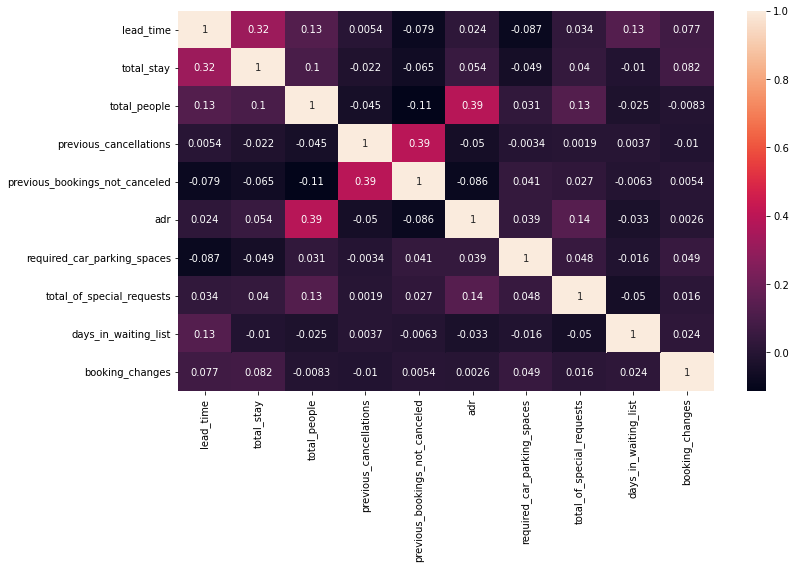

In [79]:
correlation = num_hotel_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sbn.heatmap(correlation, xticklabels = correlation.columns , yticklabels = correlation.columns, annot=True)

    CONCLUSION:

    1.'Total_stay' and 'lead_time' have slight correlation. This means that for long hotel stays people generally plan much before the 
    actual arrival.

    2.'adr' is slightly correlated with 'total_people', which makes sense as more no. of people means more revenue, therefore more 'adr'.

    Lets see does length of stay affects the adr.


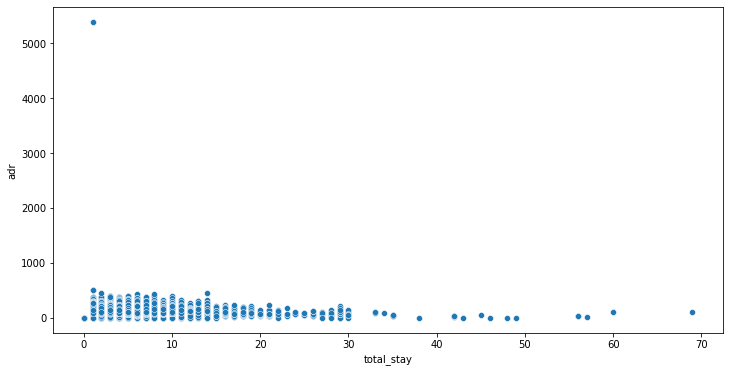

In [80]:
plt.figure(figsize = (12,6))
sbn.scatterplot(y = 'adr', x = 'total_stay', data = hotel_df)
plt.show()

    CONCLUSION:We notice that there is an outlier in adr, so we will remove it for best scatter plot.

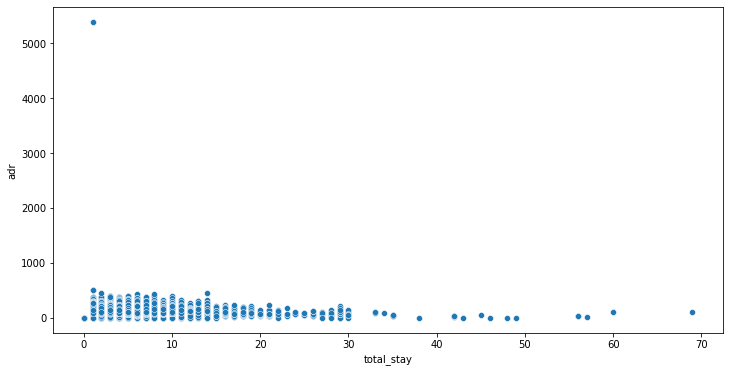

In [81]:
plt.figure(figsize = (12,6))
sbn.scatterplot(y = 'adr', x = 'total_stay', data = hotel_df)
plt.show()

    CONCLUSION:From the scatter plot we can see that as length of 'total_stay' increases  the 'adr' decreases. 
    This means for longer stay, the better deal for customer can be finalised.

###Univariate Analysis

#####(1)Agent making most number of bookings?

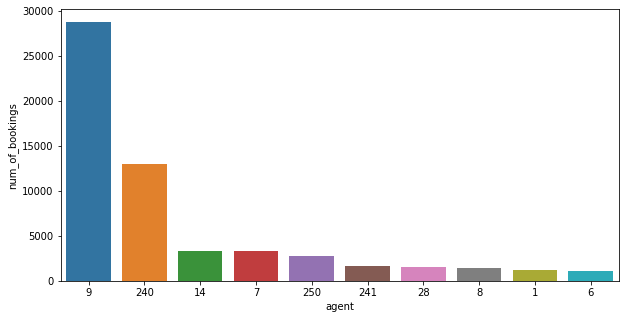

In [82]:
hotel_pd = pd.DataFrame(hotel_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
hotel_pd.drop(hotel_pd[hotel_pd['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
hotel_pd = hotel_pd[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sbn.barplot(x = 'agent', y = 'num_of_bookings', data = hotel_pd, order = hotel_pd.sort_values('num_of_bookings', ascending = False).agent)


    CONCLUSION:Agent no. 9 has made most no. of bookings.

#####(2)Which meal type is most preffered meal of customers?

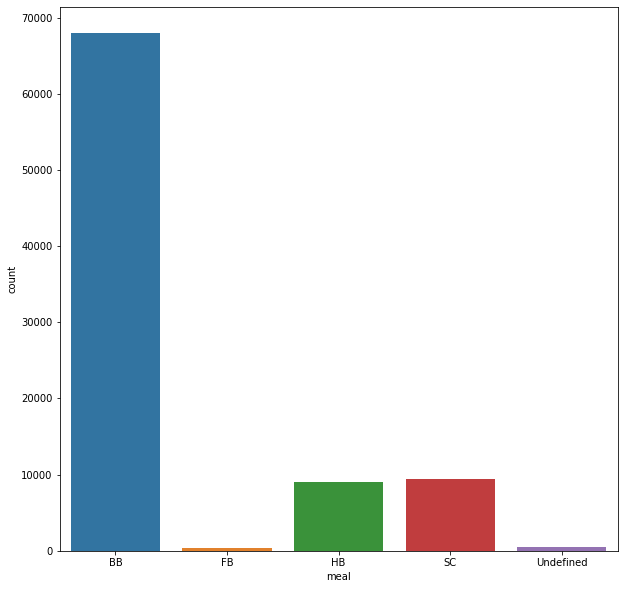

In [83]:
plt.figure(figsize=(10, 10))
sbn.countplot(x = hotel_df['meal'])
plt.show()

    CONCLUSION:Most preferred meal type is BB (Bed and breakfast).

#####3)Which room type is in most demand and which room type generates highest adr?

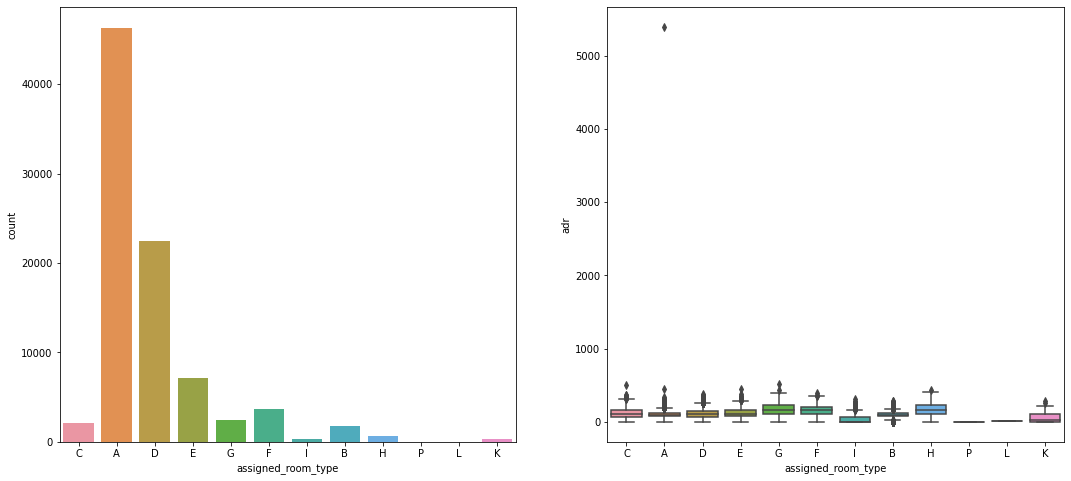

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = hotel_df.groupby('assigned_room_type')
hotel_pd['Num_of_bookings'] = grp_by_room.size()

sbn.countplot(ax = axes[0], x = hotel_df['assigned_room_type'])
sbn.boxplot(ax = axes[1], x = hotel_df['assigned_room_type'], y = hotel_df['adr'])
plt.show()

          Most demanded room type is A, but better 'adr' rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

###HOTEL-WISE ANALYSIS

#####(1)Percentage of bookings in city hotel and resort hotel.

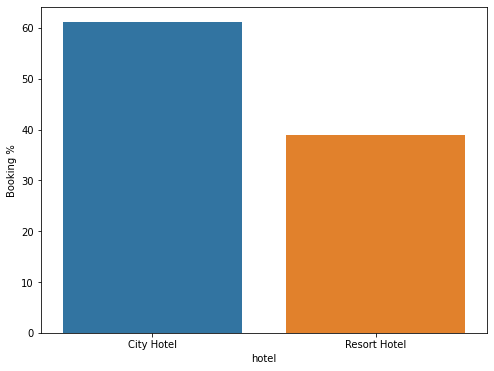

In [85]:
grouped_by_hotel = hotel_df.groupby('hotel')
hotel_pd = pd.DataFrame((grouped_by_hotel.size()/hotel_df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,6))
sbn.barplot(x = hotel_pd['hotel'], y = hotel_pd['Booking %'] )
plt.show()

       CONCLUSION:The city hotel has 60% bookings while the resort hotel has 40% bookings. 

#####(2)Which hotel makes more revenues?

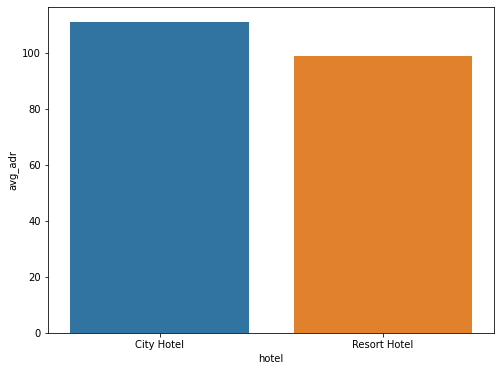

In [86]:
v1 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,6))
sbn.barplot(x = v1['hotel'], y = v1['avg_adr'] )
plt.show()

     CONCLUSION:City hotel seems to be making slightly more revenue.

#####(3)Preferred length of stay in each hotel.

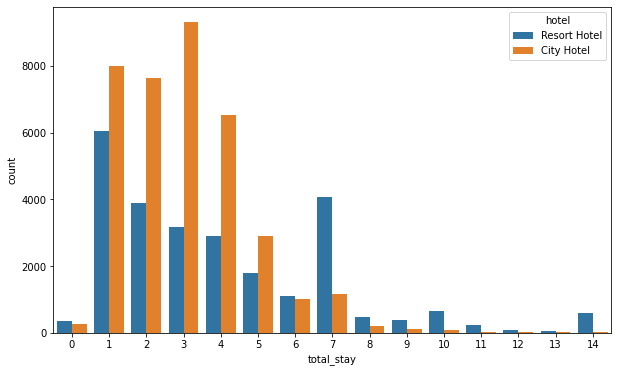

In [87]:
not_cancelled = hotel_df[hotel_df['is_canceled'] == 0]
v2 = not_cancelled[not_cancelled['total_stay'] < 15]
plt.figure(figsize = (10,6))
sbn.countplot(x = v2['total_stay'], hue = v2['hotel'])
plt.show()

    CONCLUSION:Preffered length of stay in city hotel is around 3 days and in resort hotel is around 2 days.

#####(4)Hotel with higher lead time.

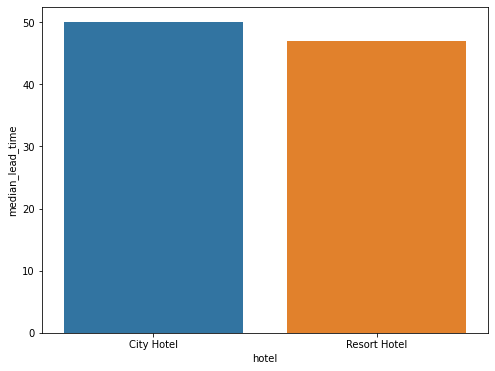

In [88]:
v3 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,6))
sbn.barplot(x = v3['hotel'], y = v3['median_lead_time'] )
plt.show()

    CONCLUSION:Lead time in city hotel is slightly higher in resort time.

#####(5)Hotel with longer waiting time.

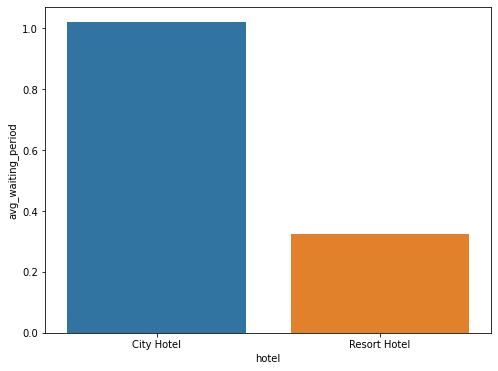

In [89]:
v4 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,6))
sbn.barplot(x = v4['hotel'], y = v4['avg_waiting_period'])
plt.show()

    CONCLUSION:City hotel has slightly longer waiting time.Hence,it is most busier than resort hotel.

#####(6)Hotel with higher chance of customers returning for another stay.

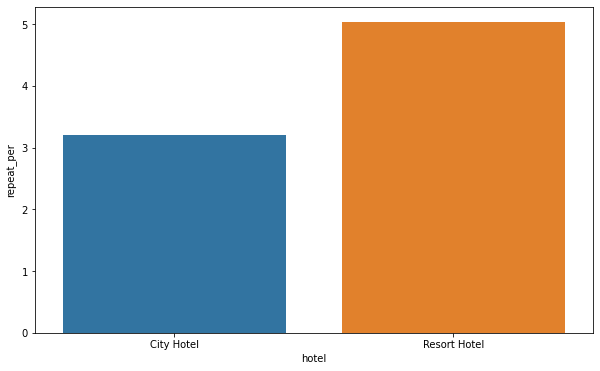

In [90]:
#Counting repeat customer bookings
repeat_customer = hotel_df[hotel_df['is_repeated_guest'] == 1]
repeat_grp = repeat_customer.groupby('hotel')
a1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeat_guests'})

#Counting total bookings
total_booking = grouped_by_hotel.size()
a2 = pd.DataFrame(total_booking).rename(columns = {0:'total_bookings'})
a3 = pd.concat([a1,a2],axis = 1)

#Calculation repeat percentage
a3['repeat_per'] = round((a3['total_repeat_guests']/a3['total_bookings'])*100,2)

plt.figure(figsize = (10,6))
sbn.barplot(x = a3.index , y = a3['repeat_per'])
plt.show()

    CONCLUSION:The resort hotel has higher chance of customers returning for another stay.

#####(7)Hotel with highest booking cancellation.

In [91]:
#Counting of cancelled booking for each hotel
cancelled_booking = hotel_df[hotel_df['is_canceled'] == 1]
cancelled_grp = cancelled_booking.groupby('hotel')
a1 = pd.DataFrame(cancelled_grp.size()).rename(columns = {0 : 'total_cancelled_bookings'})

#Counting total number of booking for each type of hotel
grouped_by_hotel = hotel_df.groupby('hotel')
total_booking = grouped_by_hotel.size()
a2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
a3 = pd.concat([a1,a2], axis = 1)

# Calculating cancel percentage 
a3['cancel_per'] = round((a3['total_cancelled_bookings']/a3['total_bookings'])*100,2)
a3

,total_cancelled_bookings,total_bookings,cancel_per
hotel,,,
City Hotel,16049,53428,30.04
Resort Hotel,7976,33968,23.48


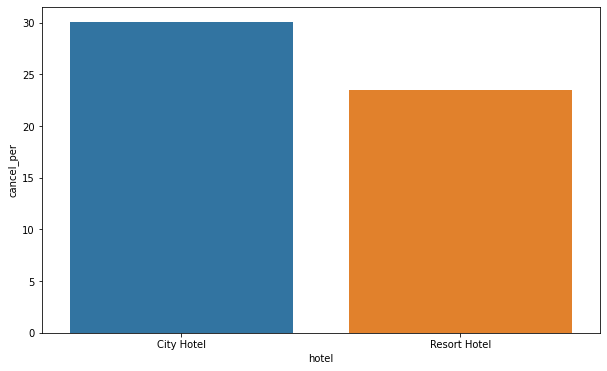

In [92]:
plt.figure(figsize = (10,6))
sbn.barplot(x = a3.index, y = a3['cancel_per'])
plt.show()

    CONCLUSION:The rate of cancellation of booking is highest in city hotel.

###DISTRIBUTION CHANNEL-WISE ANALYSIS

#####(1)Most common channel for booking hotels.

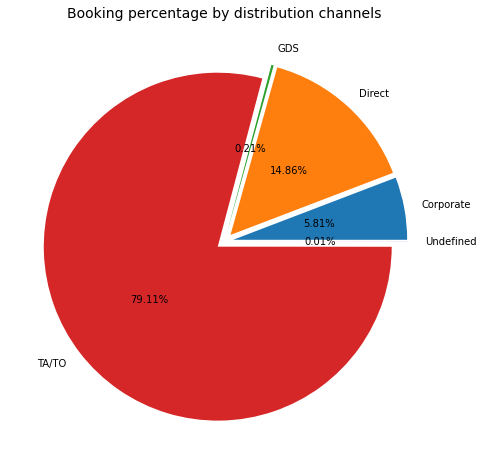

In [93]:
group_by_dist = hotel_df.groupby('distribution_channel')
hotel_pd = pd.DataFrame(round((group_by_dist.size()/hotel_df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_per'})
plt.figure(figsize = (8,8))
data = hotel_pd['Booking_per']
labels = hotel_pd['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking percentage by distribution channels", fontsize=14);

    CONCLUSION:TA/TO is the most common channel for booking hotels.

#####(2)Channel being used for early hotel bookings.

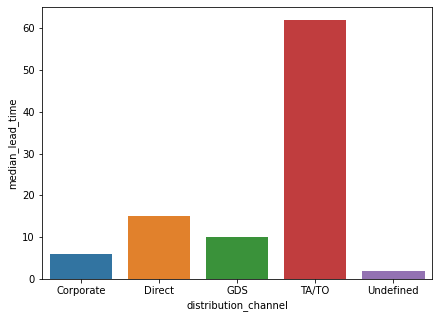

In [94]:
group_by_dist = hotel_df.groupby('distribution_channel')
v2 = pd.DataFrame(round(group_by_dist['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sbn.barplot(x = v2['distribution_channel'], y = v2['median_lead_time'])
plt.show()

    CONCLUSION:TA/TO is used for early hotel bbokings.

#####(3)Channel with longer waiting time.

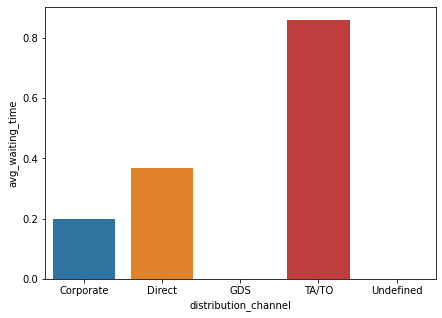

In [95]:
v4 = pd.DataFrame(round((group_by_dist['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sbn.barplot(x = v4['distribution_channel'], y = v4['avg_waiting_time'])
plt.show()

    CONCLUSION:Waiting time is little longer via TA/TO to get confirm booking of rooms.

#####(4)Distribution channel with better revenue generating deals for hotels.

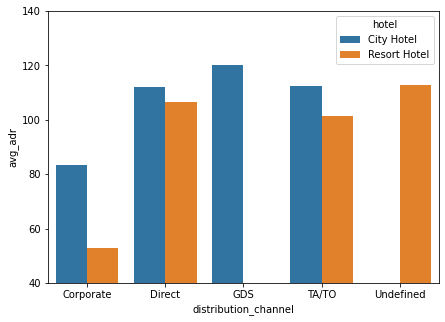

In [96]:
group_by_dist_hotel = hotel_df.groupby(['distribution_channel', 'hotel'])
v3 = pd.DataFrame(round((group_by_dist_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sbn.barplot(x = v3['distribution_channel'], y = v3['avg_adr'], hue = v3['hotel'])
plt.ylim(40,140)
plt.show()

    CONCLUSION:GDS channel brings higher revenue generating deals for City hotel.
    Resort hotel has more revnue generating deals by direct and TA/TO  channel.
    Resort Hotel need to increase outreach on GDS channel to increase revenue.

###BOOKING CANCELLATION ANALYSIS

#####(1)Distribution channel with highest cancellation percentage.

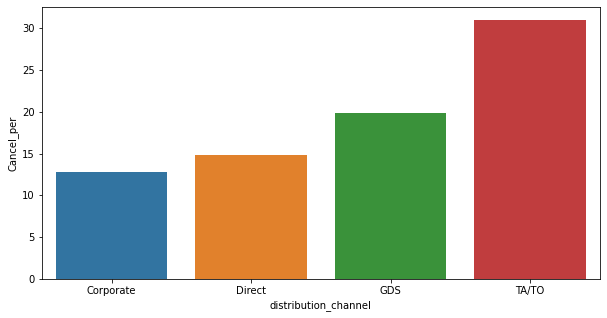

In [97]:
hotel_pd = pd.DataFrame((group_by_dist['is_canceled'].sum()/group_by_dist.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_per'})
plt.figure(figsize = (10,5))
sbn.barplot(x = hotel_pd.index, y = hotel_pd['Cancel_per'])
plt.show()

    CONCLUSION:TA/TO has highest booking cancellation percentage.Bookings made via TA/TO is 30% likely to get cancelled.

#####(2)Causes for cancellation of bookings.

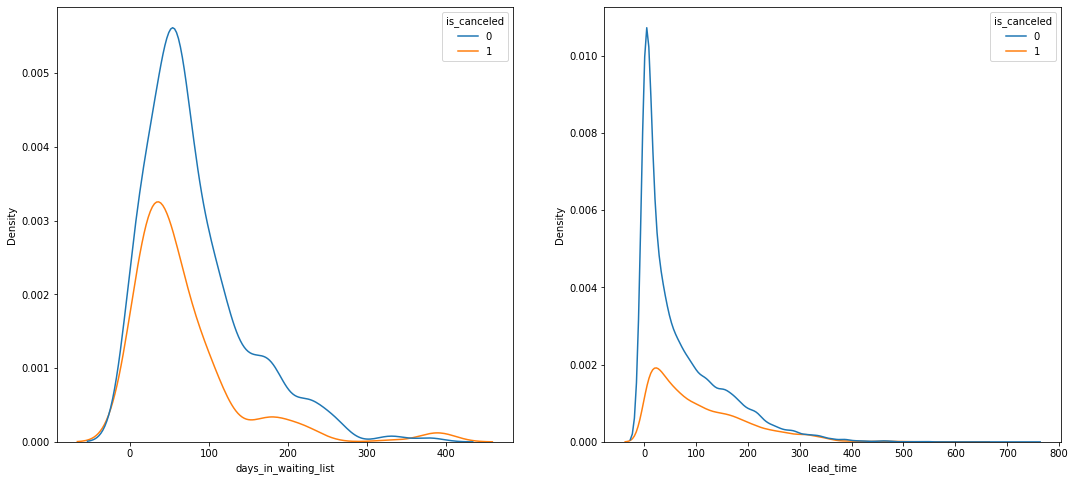

In [98]:
waiting_bookings = hotel_df[hotel_df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sbn.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sbn.kdeplot(ax = axes[1], x = hotel_df['lead_time'], hue = hotel_df['is_canceled'])
plt.show()

    CONCLUSION:We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that
    are not cancelled also have waiting period less than 150 days. 
    Hence this shows that waiting period has no effect on cancellation of bookings.

###TIME-WISE ANALYSIS

#####(1)The month with most visitors.

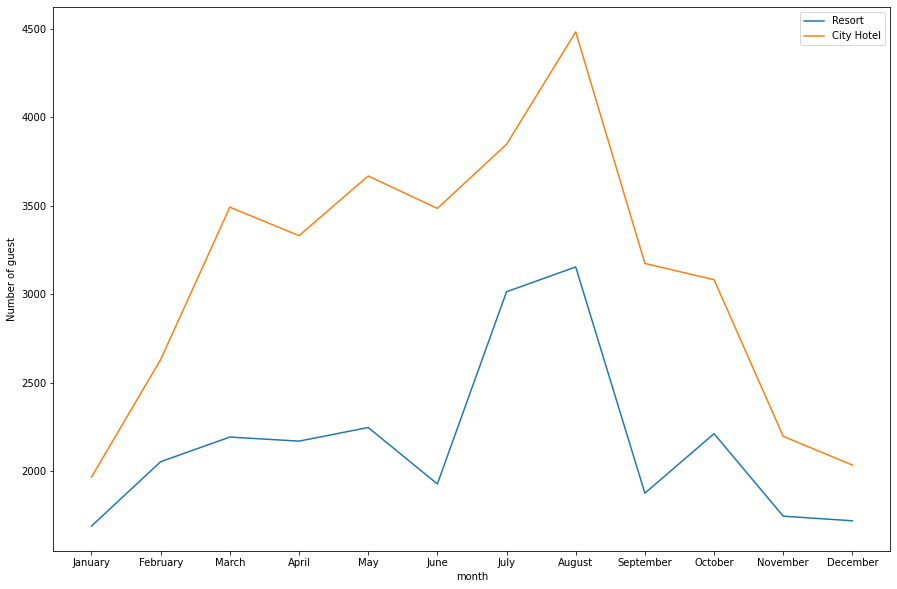

In [99]:
#Finding the most busy months
busy_month = hotel_df['arrival_date_month'].value_counts().reset_index()
busy_month.columns=['months','Number of guests']
busy_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
busy_month['months'] = pd.Categorical(busy_month['months'], categories=months, ordered=True)
busy_month.sort_values('months').reset_index()

resort_data = hotel_df[(hotel_df['hotel'] == 'Resort Hotel') & (hotel_df['is_canceled'] == 0)]
city_data = hotel_df[(hotel_df['hotel'] == 'City Hotel') & (hotel_df['is_canceled'] == 0)]
resort_hotel = resort_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel= city_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel_data = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel_data.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel_data

resort_guest = resort_data['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = city_data['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest_data=resort_guest.merge(city_guest, on = 'month')
final_guest_data.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest_data
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest_data['month'] = pd.Categorical(final_guest_data['month'], categories=months, ordered=True)
final_guest_data = final_guest_data.sort_values('month').reset_index()

#Plotting the month with most visitors
sbn.lineplot(data=final_guest_data, x='month', y='no of guests in resort')
sbn.lineplot(data=final_guest_data, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(15,10)

    CONCLUSION:The month of august welcomes the most number of guests.

#####(2)Highest revenue generating month.

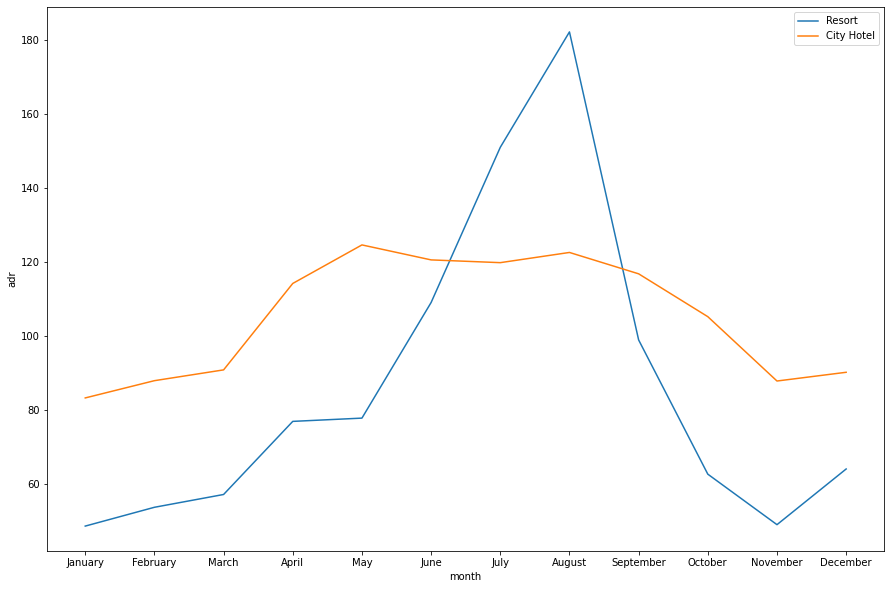

In [100]:
#Finding the highest revenue generating month
resort_data = hotel_df[(hotel_df['hotel'] == 'Resort Hotel') & (hotel_df['is_canceled'] == 0)]
city_data = hotel_df[(hotel_df['hotel'] == 'City Hotel') & (hotel_df['is_canceled'] == 0)]
resort_hotel = resort_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = city_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel_data = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel_data.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_hotel_data['month'] = pd.Categorical(final_hotel_data['month'], categories=months, ordered=True)
final_hotel_data = final_hotel_data.sort_values('month').reset_index()
sbn.lineplot(data=final_hotel_data, x='month', y='price_for_resort')
sbn.lineplot(data=final_hotel_data, x='month', y='price_for_city_hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('adr')
fig = plt.gcf()
fig.set_size_inches(15,10)

    CONCLUSION:Resort in the month of August generates highest revenue.

###HIGHEST NUMBER OF BOOKING BASED ON DIFFERENT CATEGORIES.

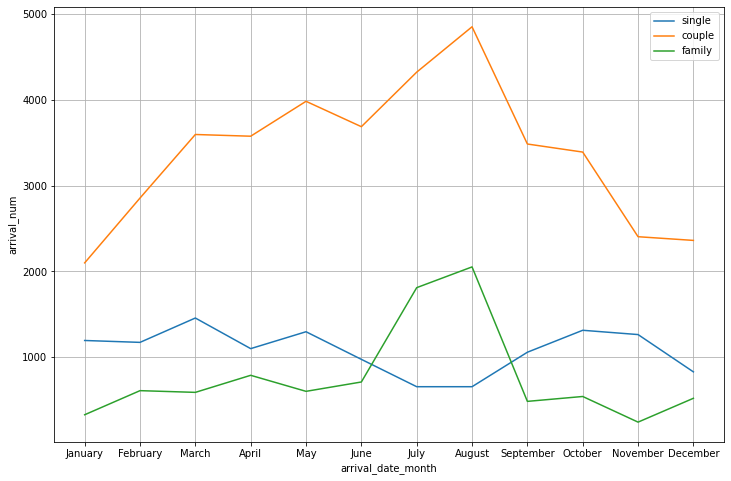

In [103]:
#The different categories can be single,couple and family

#Getting a list of single,couple and family checkins

single   = not_cancelled[(not_cancelled['adults']==1) & (not_cancelled['children']==0) & (not_cancelled['babies']==0)]
couple   = not_cancelled[(not_cancelled['adults']==2) & (not_cancelled['children']==0) & (not_cancelled['babies']==0)]
family   = not_cancelled[not_cancelled['adults'] + not_cancelled['children'] + not_cancelled['babies'] > 2]

month = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  hotel_df = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  hotel_df['arrival_date_month'] = pd.Categorical(hotel_df['arrival_date_month'],categories=month,ordered=True)
  sbn.lineplot(data=hotel_df, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.show()

    CONCLUSION:There is no inclusion of couple checkins in the data, so it can't be said surely but by going with 
    the graph highest no. of bookings are by the couple.